<h1 style="text-align:center">Mid-Term 2</h1>
<h3 style="text-align:center">MCHE485: Mechanical Vibrations &mdash; Spring 2016</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
<a href="http://www.ucs.louisiana.edu/~jev9637/">http://www.ucs.louisiana.edu/~jev9637/</a></p>

This notebook contains select solutions to the problems from the first mid-term in the Spring semester of 2016.

In [1]:
import numpy as np                  # import NumPy with the namespace np
from scipy.integrate import odeint  # import the ODE solver for simluation

In [2]:
%matplotlib inline

# import the plotting functions
import matplotlib.pyplot as plt

## Problem 1

The system in Figure 1 consists of point mass $m$ attached to the end of a massless, inextensible link of length $l$. The mass is also connected to ground via a rotational damper, $c$.
<p style="text-align:center">
	<img src="http://shared.crawlab.org/inverted_pendulum_with_rotationaldamper.png" alt="Inverted Pendulum with Damper" width=25%><br>
    <strong>Figure 1: Inverted Pendulum with Damper</strong>
</p>


a. Write the equation of motion for this system.    

b. Rewrite the equation of motion as a system of first- order differential equation.    

c. Plot the response, $\theta(t)$, to initial conditions: $\theta(0) = 0$ and $\dot{\theta}(0) = \omega_0$. Be sure to clearly label all axes and important points and trends on the plot.    

d. What is the natural frequency at the $\theta = 0$ equilibrium point? Is it different than the natural frequency at the $\theta = 180^\circ$ equilibrium? Why or why not?    

We'll use the answer to part b to simluation the system and create the plots for part c.

In [3]:
def eq_of_motion(w, t, p):
    """
    Defines the equations of motion for the system
    
    Arguments:
        w : the system states (theta, theta_dot)
        t : current time step 
        p : Other paramters m, g, l, c
    """
    
    theta, theta_dot = w
    m, g, l, c = p

    # Create sysODE = (theta', theta_dot')
    sysODE = [theta_dot,
              g / l * np.sin(theta) - c / (m * l**2) * theta_dot]
    return sysODE

In [4]:
# Define the system parameters
m = 1.0             # mass (kg)
g = 9.81            # acceleration of gravity (m/s^2)
l = 1.0             # length of the pendulum (m)
c = 1.0             # rotaional damping coeff. (Ns/rad)

In [5]:
# Set up simulation parameters

# ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 10.0
numpoints = 10001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.0, stoptime, numpoints)

# Initial conditions
theta_init = 0.0                        # initial position
theta_dot_init = 0.01                    # initial velocity

# Pack the parameters and initial conditions into arrays 
p = [m, g, l, c]
x0 = [theta_init, theta_dot_init]

Now, we will actually call the ode solver, using the ```odeint()``` function from the SciPy library. For more information on ```odeint```, see [the SciPy documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).

In [6]:
# Call the ODE solver.
resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

The solver returns the time history of each state. To plot an individual response, we just simply pick the corresponding column. Below, we'll plot the position of the mass as a function of time.

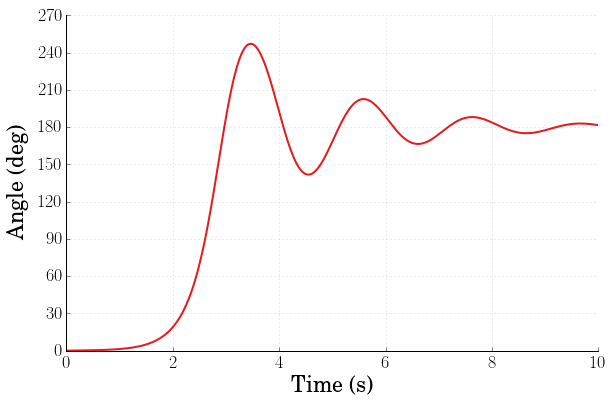

In [7]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Angle (deg)', family='serif', fontsize=22, weight='bold', labelpad=10)

# Plot the first element of resp for all time. It corresponds to the position.
plt.plot(t, resp[:,0] * 180/np.pi, linewidth=2, linestyle = '-', label=r'Response')

# uncomment below and set limits if needed
# plt.xlim(0,5)
plt.yticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270])

# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad = 0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE485_InvertedPendulumWithDamping.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

## Problem 2
The system in Figure 2 consists of a mass, $m$, sliding inside a circular arc of radius, $R$. There is friction between the mass and the surface of the arc, represented by coefficient of friction $\mu$.

a. Write the equations of motion for this system.    

b. Linearize the equations of motion as much as possible about the equilibrium point, $\theta_{eq} = 0$. (*Hint:* There will be just one term that you likely do not have the skills to linearize yet. You may leave it in its nonlinear form.)    

c. Plot the response, $\theta(t)$, to initial conditions:
		 $$\theta(0) = \theta_0 \quad \mbox{and} \quad  \dot{\theta}(0) = 0$$
for two values of $\mu$, labeling them "low-friction" and "high-friction" in your plot. Be sure to clearly label all axes and important points and trends on the plot.   

If you are unable to complete parts a -- c above using the system in Figure 2, then you may use a spring-mass system sliding on flat ground, as sketched in Figure 3, substituting $x$ for $\theta$ where appropriate in the questions. The maximum amount of points available for using this simpler model is half of the problem total.

<p style="text-align:center; float:left; width:48%">
	<img src="http://shared.crawlab.org/mass_friction_halfCircle.png" alt="Mass Sliding in Circular Arc" width=100%><br>
    <strong>Figure 2: Mass Sliding in Circular Arc</strong>
</p>
<br>
<br>
<br>
<br>
<p style="text-align:center; float:right; width:48%">
	<img src="http://shared.crawlab.org/MassSpring_Friction.png" alt="Mass on Flat Ground" width=65%><br>
    <strong>Figure 3: Mass on Flat Ground</strong>
</p>

In [8]:
def eq_of_motion(w, t, p):
    """
    Defines the equations of motion for the system
    
    Arguments:
        w : the system states (theta, theta_dot)
        t : current time step 
        p : Other paramters m, g, R, mu
    """
    
    theta, theta_dot = w
    m, g, R, mu = p

    # Create sysODE = (theta', theta_dot')
    sysODE = [theta_dot,
              -g / R * np.sin(theta) - mu * R * theta_dot**2 * np.sign(theta_dot) - mu * g * R * np.cos(theta) * np.sign(theta_dot)]
    
    return sysODE

In [9]:
# Define the system parameters
m = 10.0             # mass (kg)
g = 9.81            # acceleration of gravity (m/s^2)
R = 1.0             # length of the pendulum (m)
mu = 0.01             # rotaional damping coeff. (Ns/rad)

# Set up simulation parameters

# ODE solver parameters
abserr = 1.0e-3
relerr = 1.0e-3
max_step = 0.01
stoptime = 10.0
numpoints = 10001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.0, stoptime, numpoints)

# Initial conditions
theta_init = 10.0 * np.pi / 180          # initial position
theta_dot_init = 0.0                    # initial velocity

# Pack the parameters and initial conditions into arrays 
p = [m, g, R, mu]
x0 = [theta_init, theta_dot_init]

Now, we will actually call the ode solver, using the ```odeint()``` function from the SciPy library. For more information on ```odeint```, see [the SciPy documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).

In [10]:
# Call the ODE solver.
resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

# Find the location of the last cycle peaks - we'll use to plot the linear decay envelope
last_min = np.min(resp[:,0]* (t > 7))
last_min_t = t[np.argmin(resp[:,0] * (t > 7))]
last_max = np.max(resp[:,0]* (t > 6.5))
last_max_t = t[np.argmax(resp[:,0]* (t > 6.5))]

The solver returns the time history of each state. To plot an individual response, we just simply pick the corresponding column. Below, we'll plot the position of the mass as a function of time.

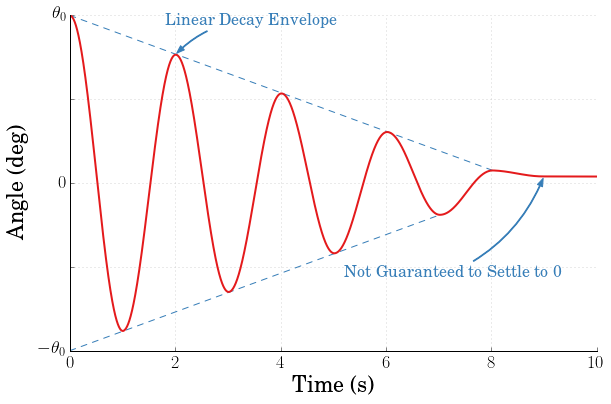

In [11]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Angle (deg)', family='serif', fontsize=22, weight='bold', labelpad=10)

# Add the (linear) decay envelopes
plt.plot([0., last_max_t],[theta_init * 180/np.pi, last_max * 180/np.pi], color = "#377eb8", linewidth=1.0, linestyle="--")
plt.plot([0., last_min_t],[-theta_init * 180/np.pi, last_min * 180/np.pi], color = "#377eb8", linewidth=1.0, linestyle="--")

plt.annotate(r'Linear Decay Envelope',
         xy=(t[2001],resp[2001,0] * 180/np.pi), xycoords='data',
         xytext=(-10, +30), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="simple, head_width = 0.35, tail_width=0.05", connectionstyle="arc3,rad=.2", color="#377eb8"),color = "#377eb8")

plt.annotate(r'Not Guaranteed to Settle to 0',
         xy=(t[9001],resp[9001,0] * 180/np.pi), xycoords='data',
         xytext=(-200, -100), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="simple, head_width = 0.35, tail_width=0.05", connectionstyle="arc3,rad=.2", color="#377eb8"),color = "#377eb8")

# Plot the first element of resp for all time. It corresponds to the position.
plt.plot(t, resp[:,0] * 180/np.pi, linewidth=2, linestyle = '-', label=r'Response')

# uncomment below and set limits if needed
# plt.xlim(0,5)
plt.yticks([-10, -5, 0, 5, 10], [r'$-\theta_0$', '', '$0$', '', r'$\theta_0$'])

# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad = 0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
plt.savefig('MCHE485_CircularArc_Friction.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

## Problem 2 Alternate (1/2-credit) Solution
The system in Figure 2 consists of a mass, $m$, sliding inside a circular arc of radius, $R$. There is friction between the mass and the surface of the arc, represented by coefficient of friction $\mu$.

If you are unable to complete parts a -- c above using the system in Figure 2, then you may use a spring-mass system sliding on flat ground, as sketched in Figure 3, substituting $x$ for $\theta$ where appropriate in the questions. The maximum amount of points available for using this simpler model is half of the problem total.

<p style="text-align:center;">
	<img src="http://shared.crawlab.org/MassSpring_Friction.png" alt="Mass on Flat Ground" width=35%><br>
    <strong>Figure 3: Mass on Flat Ground</strong>
</p>

In [12]:
# Define the system as a series of 1st order ODES (beginnings of state-space form)
def eq_of_motion(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x, x_dot]
        t :  time
        p :  vector of the parameters:
                  p = [m, k, mu, g]
    """
    x, x_dot = w
    m, k, mu, g = p

    # Create sysODE = (x', x_dot'):
    sysODE = [x_dot,
             (-k * x - mu*m*g*np.sign(x_dot)) / m]
    return sysODE

In [13]:
# Define the System Parameters

m = 1.0                        # mass (kg)
k = (1.0*2.0*np.pi)**2         # spring constant (N/m)
mu = 0.1                       # Friction coefficient
g = 9.81                       # gravity

wn = np.sqrt(k/m)              # natural frequency (rad/s)

In [14]:
# Set up simulation parameters 

# ODE solver parameters
abserr = 1.0e-3
relerr = 1.0e-3
max_step = 0.01
stoptime = 10.0
numpoints = 10001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.,stoptime,numpoints)

# Initial conditions
x_init = 1.0                        # initial position
x_dot_init = 0.0                    # initial velocity

# Pack the parameters and initial conditions into arrays 
p = [m, k, mu, g]
x0 = [x_init, x_dot_init]

In [15]:
# Call the ODE solver.
resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

# Find the location of the last cycle peaks - we'll use to plot the linear decay envelope
last_min = np.min(resp[:,0]* (t > 9))
last_min_t = t[np.argmin(resp[:,0] * (t > 9))]
last_max = np.max(resp[:,0]* (t > 8.5))
last_max_t = t[np.argmax(resp[:,0]* (t > 8.5))]

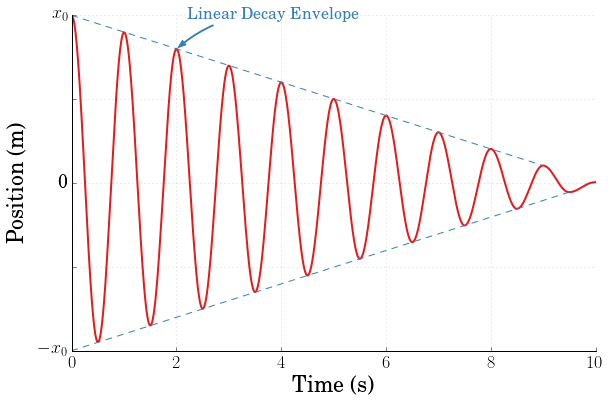

In [16]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel('Time (s)',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Position (m)',fontsize=22,weight='bold',labelpad=10)
plt.yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5], ['', r'$-x_0$', '', '0', '', r'$x_0$', ''])

# plot the response
plt.plot(t, resp[:,0], linewidth=2)

# Add the (linear) decay envelopes
plt.plot([0., last_max_t],[x_init, last_max], color = "#377eb8", linewidth=1.0, linestyle="--")
plt.plot([0., last_min_t],[-x_init, last_min], color = "#377eb8", linewidth=1.0, linestyle="--")

plt.annotate(r'Linear Decay Envelope',
         xy=(t[2001],resp[2001,0]), xycoords='data',
         xytext=(+10, +30), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="simple, head_width = 0.35, tail_width=0.05", connectionstyle="arc3,rad=.2", color="#377eb8"),color = "#377eb8")

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('MCHE485_MidTerm2_Spring2016_CoulombDamping_Resp_High.pdf', dpi=600)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

## Problem 3
The system in Figure 4 is a common model used for rotating machinery. It consists of a mass, $m_1$, connected to ground through two mounting points. The mounts can be modeled as a parallel spring, $k$, and a damper, $c$. A second mass, $m_2$, is offset from center by eccentricity, $e$, and is rotating at an angular velocity of $\omega$.

<p style="text-align:center">
	<img src="http://shared.crawlab.org/RotatingImbalance_DualMount.png" alt="Rotating Imbalance" width=35%><br>
    <strong>Figure 4: Rotating Imbalance</strong>
</p>

## Part d
Sketch the approximate frequency response for $\zeta = 0.0$ and $\zeta = 0.2$. Be sure to indicate:
1. Magnitude as $\omega$ approaches 0.
2. Magnitude as $\omega$ approaches infinity.
3. Magnitude when $\omega$ equals the natural frequency of the system, $\omega_n$.

In [17]:
# Define the system pararmeters
k = (2 * np.pi)**2        # Spring constant (N/m)
m1 = 1.75                     # Sprung/main mass (kg)
m2 = 0.25                     # rotating mass (kg)
b = m2/(m1 + m2)              # mass ratio    
wn = np.sqrt(2 * k/(m1 + m2))     # natural frequency (rad/s)
l = 0.1                       # Eccentricity


z = 0.1                       # Damping Ratio
c = 2*z*wn*(m1 + m2)          # Select c based on desired amping ratio

In [18]:
# Set up the frequency range
w = np.linspace(0, 5*wn, 2000)            # Freq range, 0-5*wn with 2000 points in-between

# Look at undamped case
z = 0.0
x_mag_un = (l * b * w**2) / np.sqrt((wn**2 - w**2)**2 + (2 * z * w * wn)**2)

# Look at z=0.2
z = 0.2
x_mag_0p2 = (l * b * w**2) / np.sqrt((wn**2 - w**2)**2 + (2 * z * w * wn)**2)

w = w / wn # Scale frequency so the plot is normalized by the natural frequency

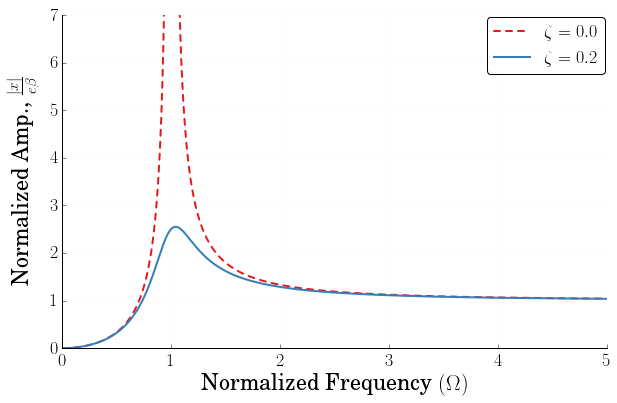

In [19]:
# Let's plot the magnitude of the frequency response

fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='Serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='Serif',fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.95')
ax.set_axisbelow(True)

plt.xlabel(r'Normalized Frequency $(\Omega)$',family='Serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'Normalized Amp., $\frac{|x|}{e \beta}$',family='Serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(w,x_mag_un/(l*b),  linewidth=2, linestyle = '--',  label=r'$\zeta = 0.0$')
plt.plot(w,x_mag_0p2/(l*b), linewidth=2, linestyle = '-', label=r'$\zeta = 0.2$')

plt.xlim(0,5)
plt.ylim(0,7)

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts() 
plt.setp(ltext,family='Serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)


# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
plt.savefig('MCHE485_Midterm2_RotatingImbalance.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

## Problem 4
The system in Figure 5 consists of two masses, $m_1$ and $m_2$. Mass $m_1$ is connected to ground via a spring, $k$, and damper, $c$. Mass $m_2$ is suspended above $m_1$ with a chain that is about to break.  Once the chain breaks, $m_2$ drops and collides inelastically with $m_1$. This can be modeled as a external step force acting on $m_1$ with amplitude equal to the gravitational forces on $m_2$. This simplified model is sketched in Figure 6.

<p style="text-align:center; float:left; width:48%">
	<img src="http://shared.crawlab.org/MassSpring_DroppedMassChained.png" alt="The System the Instant before the Chain Breaks" width=30%><br>
    <strong>Figure 5: The System the Instant before the Chain Breaks</strong>
</p>

<p style="text-align:center; float:right; width:48%">
	<img src="http://shared.crawlab.org/MassSpring_DroppedMass.png" alt="Model of the System after Mass 2 Falls" width=25%><br>
    <strong>Figure 6: Model of the System after Mass 2 Falls</strong>
</p>

In [20]:
def eq_of_motion(w, t, p):
    """
    Defines the differential equations for the direct-force mass-spring-damper system.

    Arguments:
        w :  vector of the state variables:
        t :  time
        p :  vector of the parameters:
    """
    x, x_dot = w
    m, k, c, StartTime, F_amp = p

    # Create sysODE = (x', x_dot')
    sysODE = [x_dot,
              -k/m * x - c/m * x_dot - f(t, p)/m]
    return sysODE


def f(t, p):
    """
    defines the disturbance force input to the system
    """
    m, k, c, StartTime, F_amp = p
    
    #    Just a step in force beginning at t=StartTime
    f = F_amp * (t >= StartTime)
    
    return f

In [21]:
# Define the System Parameters
m1 = 1.0                    # kg
m2 = 1.0                    # kg
g = 9.81                    # gravity (m/s)
k = (2.0 * np.pi)**2        # N/m (Selected to give an undamped natrual frequency of 1Hz)
wn = np.sqrt(k / m)         # Natural Frequency (rad/s)

z = 0.1                     # Define a desired damping ratio
c = 2 * z * wn * m          # calculate the damping coeff. to create it (N/(m/s))

In [22]:
# Set up simulation parameters

# ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 10.0
numpoints = 10001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.0, stoptime, numpoints)

# Initial conditions
x_init = 0.0                        # initial position
x_dot_init = 0.0                    # initial velocity

# Set up the parameters for the input function
StartTime = 0.5              # Time the second mass drops onto first
F_amp = m2 * g               # Amplitude of Disturbance force (N)

# Pack the parameters and initial conditions into arrays 
p = [m, k, c, StartTime, F_amp]
x0 = [x_init, x_dot_init]

In [23]:
# Call the ODE solver.
resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

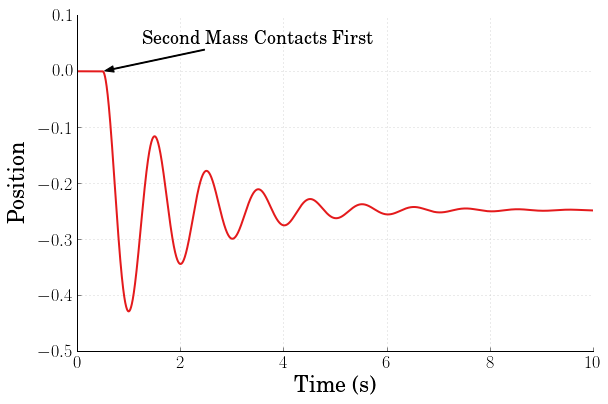

In [24]:
# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position', family='serif', fontsize=22, weight='bold', labelpad=10)

# Plot the first element of resp for all time. It corresponds to the position.
plt.plot(t, resp[:,0], linewidth=2, linestyle = '-', label=r'Response')


# Annotate when the 2nd mass contacts the first
plt.annotate(r'Second Mass Contacts First',
     xy=(StartTime, 0), xycoords='data',
     ha='center',
     xytext=(StartTime+3, 0.05), textcoords='data', fontsize=18,
     arrowprops=dict(arrowstyle="simple, head_width = 0.35, tail_width=0.05", connectionstyle="arc3", color="black"),color = "black")

# uncomment below and set limits if needed
# plt.xlim(0,5)
plt.ylim(-0.5, 0.1)

# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad = 0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE485_MidTerm2_massDrop.pdf', dpi=600)

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

<hr class = "style-end">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [25]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
import codecs
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(codecs.open(css_file, 'r', 'utf-8').read())